In [489]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [490]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [491]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [492]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [494]:
df.duplicated().sum()

240

In [495]:
df.shape

(1599, 12)

In [496]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [497]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='count'>

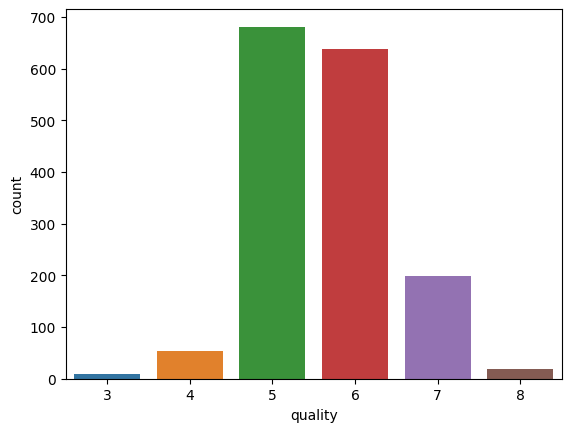

In [498]:
sns.countplot(x ='quality', data = df)

<Axes: >

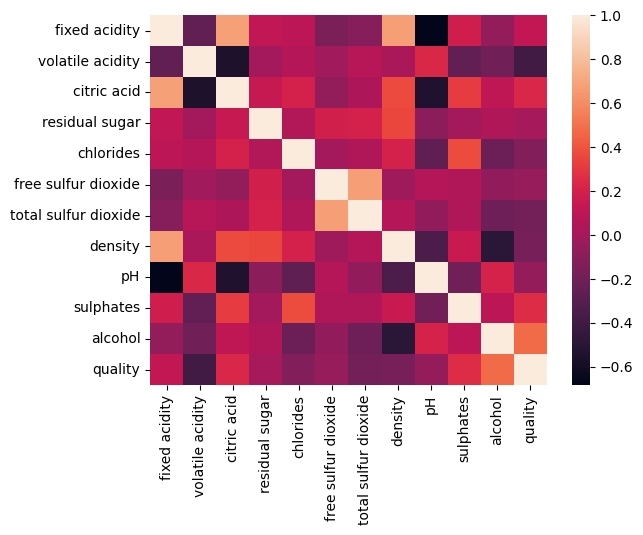

In [499]:
sns.heatmap(df.corr())

<Axes: xlabel='quality', ylabel='fixed acidity'>

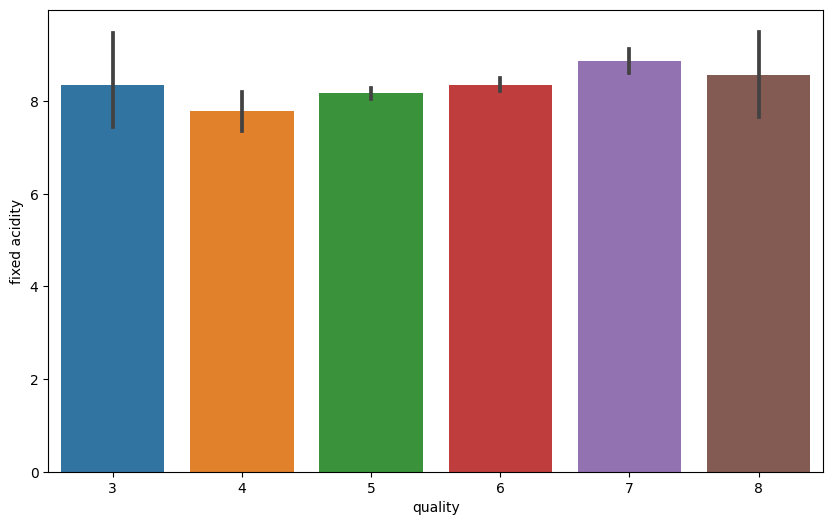

In [500]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)
#we may delete it

<Axes: xlabel='quality', ylabel='volatile acidity'>

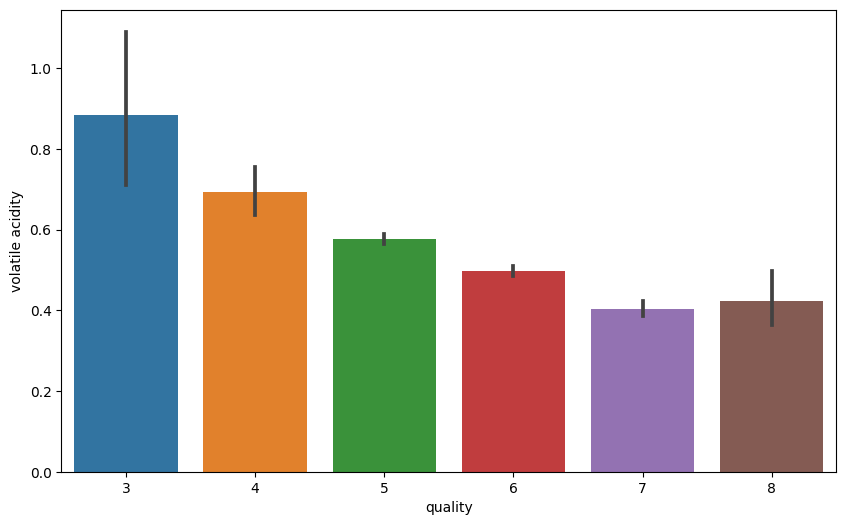

In [501]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)
#every time it decrease the qualito go up 


In [502]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: xlabel='quality', ylabel='citric acid'>

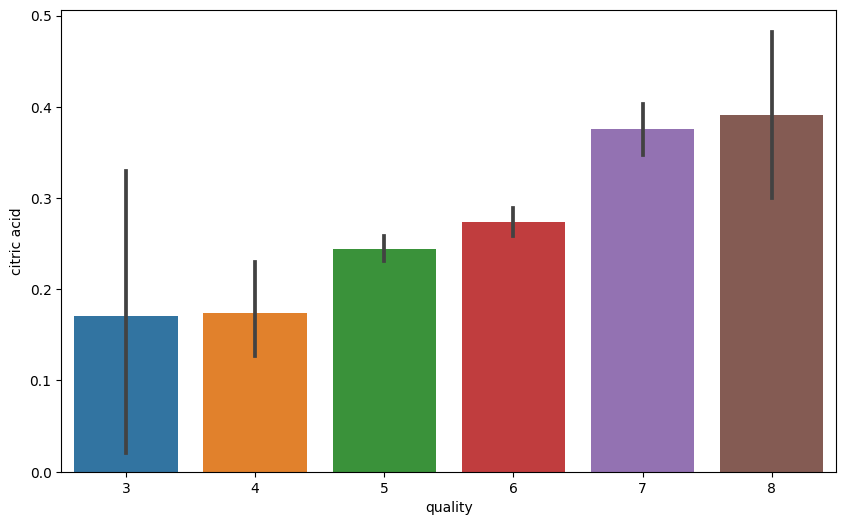

In [503]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)
#increaisng it make the quality better

<Axes: xlabel='quality', ylabel='residual sugar'>

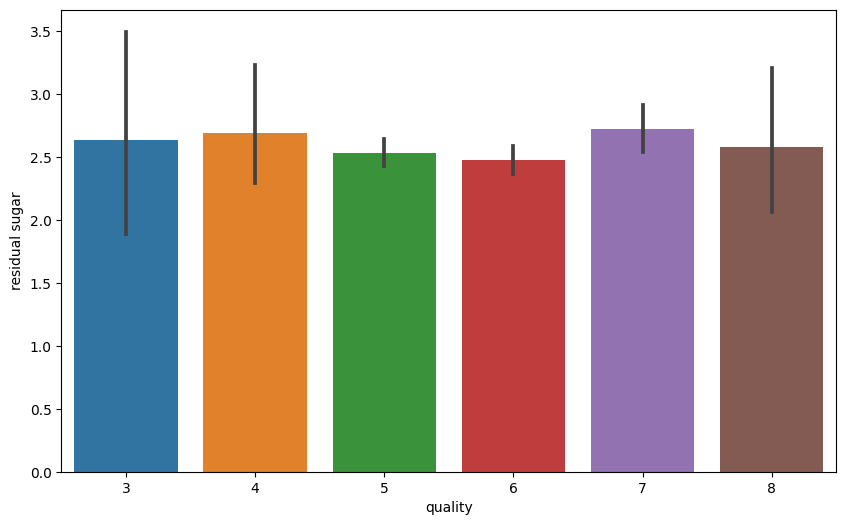

In [504]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)
#it doesnt influence

<Axes: xlabel='quality', ylabel='chlorides'>

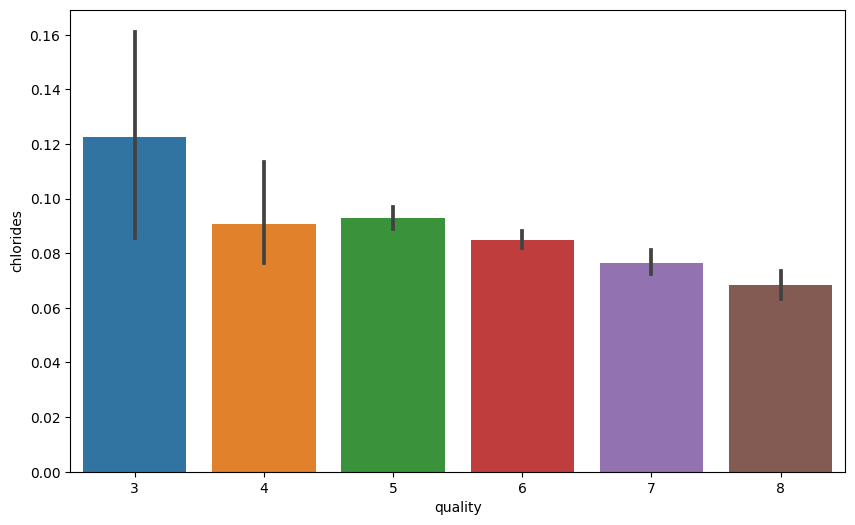

In [505]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

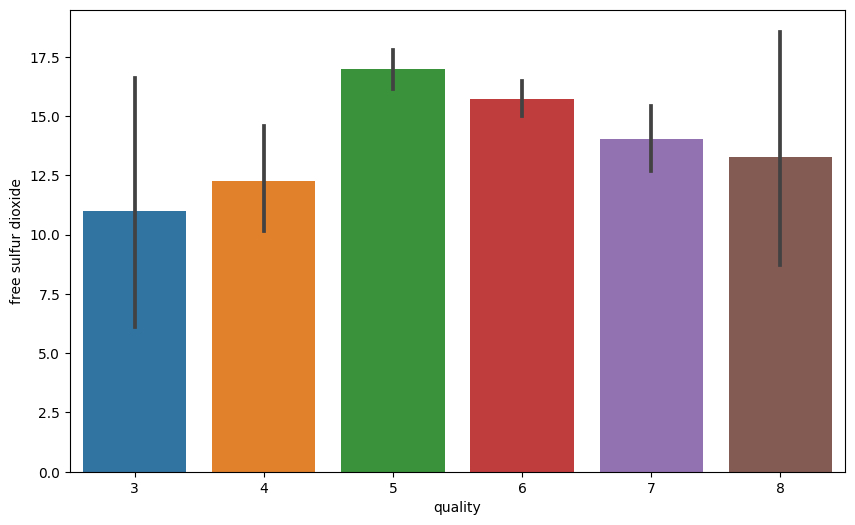

In [506]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

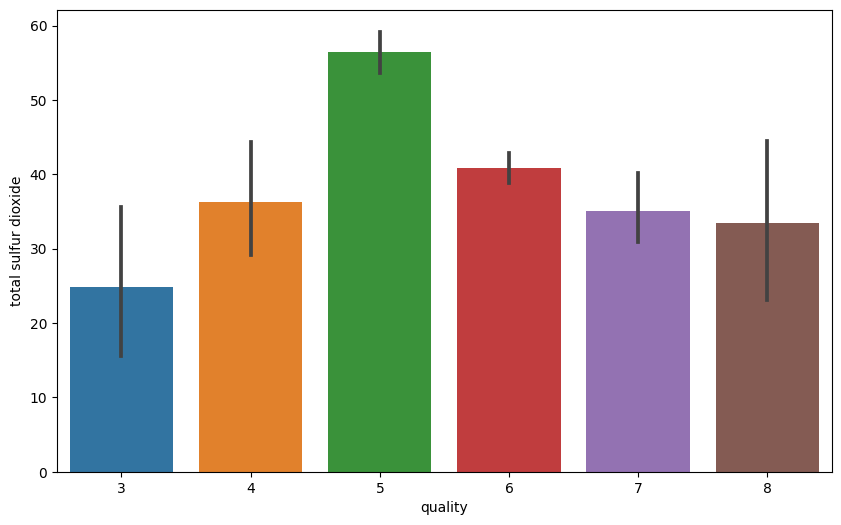

In [507]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='density'>

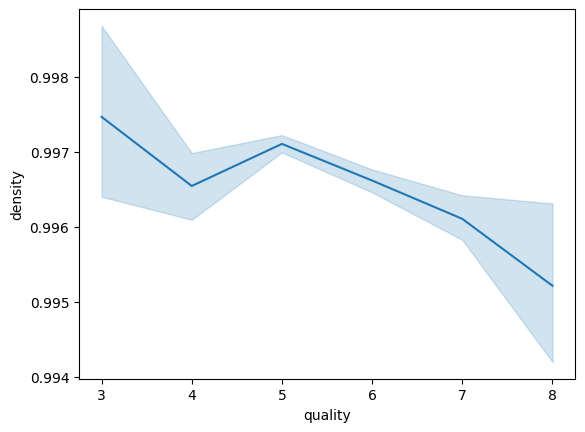

In [508]:
sns.lineplot(data=df, x="quality", y="density")

<Axes: xlabel='quality', ylabel='pH'>

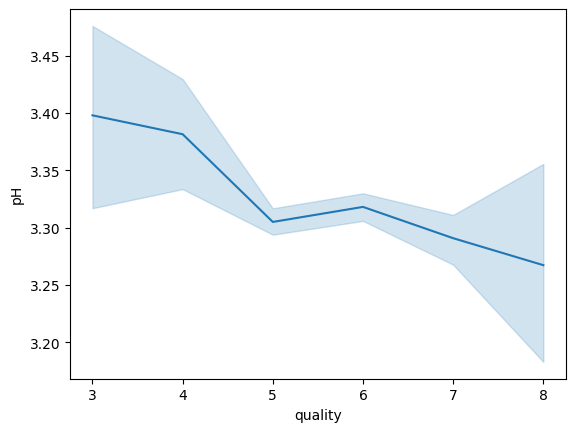

In [509]:
sns.lineplot(data=df, x="quality", y="pH")

<Axes: xlabel='quality', ylabel='sulphates'>

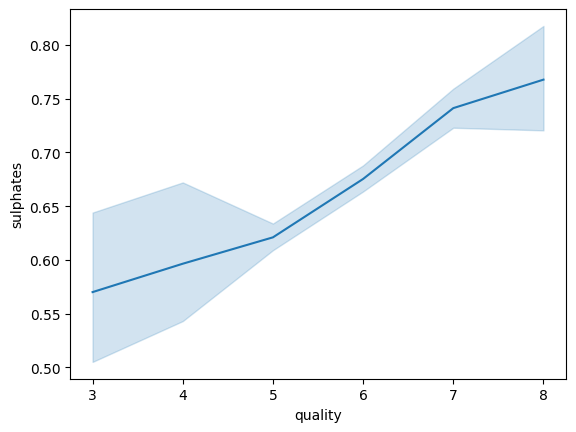

In [510]:
sns.lineplot(data=df, x="quality", y="sulphates")

<Axes: xlabel='quality', ylabel='alcohol'>

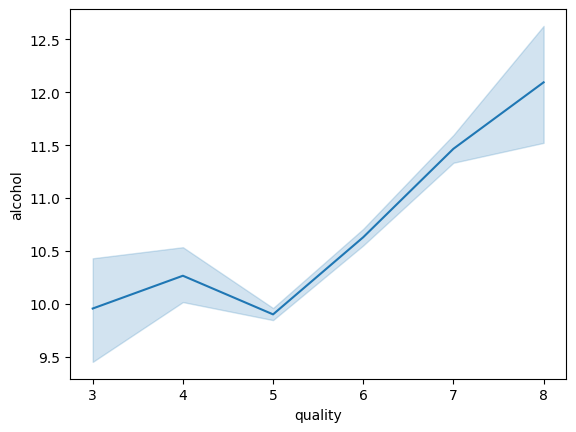

In [511]:

sns.lineplot(data=df, x="quality", y="alcohol")

In [512]:
df_train = df

In [513]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df_train['quality'] = pd.cut(df_train['quality'], bins = bins, labels = group_names)

In [514]:
le = LabelEncoder()

In [515]:
df_train ['quality'] = le.fit_transform(df_train['quality'])

In [516]:
df_train['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

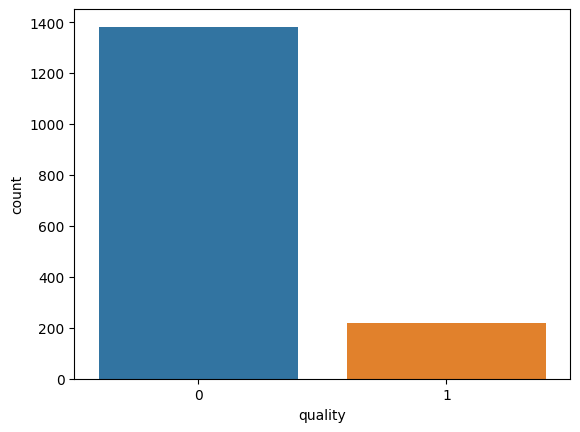

In [517]:
sns.countplot(x ='quality', data = df_train)

In [518]:
X = df_train.drop(['quality'] , axis = 1)
y= df_train['quality']

In [519]:
print (X.shape)
print (y.shape)



(1599, 11)
(1599,)


In [520]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)


In [521]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [522]:
#Applying SVC Model 

'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''

SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = SVCModel.predict(X_test)

SVCModel Train Score is :  0.8982259570494865
SVCModel Test Score is :  0.8787878787878788
----------------------------------------------------


In [523]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'gamma' : [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    
    'max_iter':[100,101,102,103,104,105,106]
}
grid_svc = GridSearchCV(SVCModel, param_grid=param, scoring='accuracy', cv=10)

In [524]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(gamma='auto', max_iter=100),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf'],
                         'max_iter': [100, 101, 102, 103, 104, 105, 106]},
             scoring='accuracy')

In [525]:
grid_svc.best_params_

{'C': 0.8, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 102}

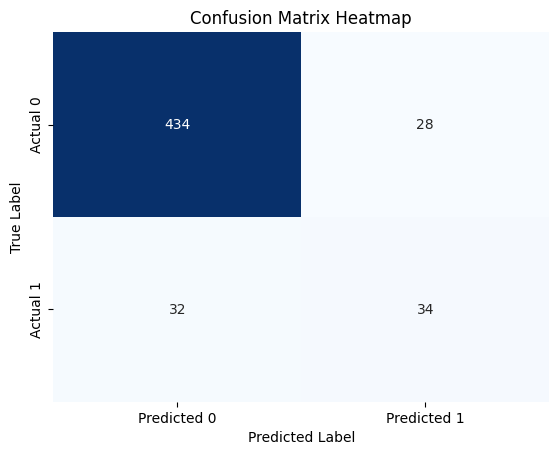

In [526]:
svc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svc_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [527]:
# trying the best parameters from grid search 
SVCModel2 = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=102,C=0.8,gamma=1)
SVCModel2.fit(X_train, y_train)

#Calculating Details
print('SVCModel2 Train Score is : ' , SVCModel2.score(X_train, y_train))
print('SVCModel2 Test Score is : ' , SVCModel2.score(X_test, y_test))
print('----------------------------------------------------')
#Calculating Prediction
y_pred2 = SVCModel.predict(X_test)

SVCModel2 Train Score is :  0.9934640522875817
SVCModel2 Test Score is :  0.8920454545454546
----------------------------------------------------


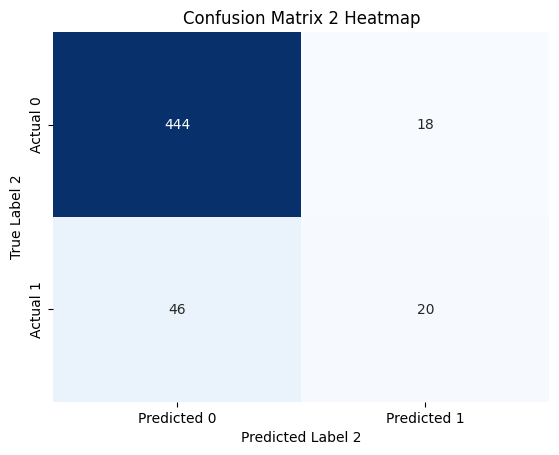

In [528]:
svc_cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(svc_cm2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.title('Confusion Matrix 2 Heatmap')
plt.xlabel('Predicted Label 2')
plt.ylabel('True Label 2')
plt.show()